In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks #contiene funciones de ajuste y minimización
import pandas as pd #funciones necesarias para manipular datos numéricos externos
from scipy.optimize import curve_fit #https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
import matplotlib.colors as mcolors
import scipy.odr as ODR
from scipy import *

# Calibracion

In [49]:
datosCal = pd.read_csv('calibracion.txt', header=0, delimiter='\t') #lee el archivo de datos
datosCal

#Hacer ajuste lineal en el eje x canal, eje y energia
x = datosCal['canal']
y = datosCal['energia']

def f(B,x):
    return B[0]*x + B[1]
linear = ODR.Model(f)
mydata = ODR.RealData(x, y)
myodr = ODR.ODR(mydata, linear, beta0=[0., 1.])
myoutput = myodr.run()
#myoutput.pprint()
m = myoutput.beta[0]
b = myoutput.beta[1]

#Funcion para calcular la energia de un canal input
def energia(canal):
    return m*canal + b
    
 

In [109]:

def leerDatos(archivo, max, min):
    global datos
    datos = pd.read_csv(archivo, header=0,sep='\t')
    #crear otra columna en datos utilizando la funcion energia
    datos["Energía (eV)"] = energia(datos["cuentas"].index)
    #Recortar los datos solo para aquellos datos que su energia este entre 1250 y 1650
    datos = datos[datos["Energía (eV)"] < max]
    datos = datos[datos["Energía (eV)"] > min]
    return datos 


def histograma(elemento):
    plt.hist(x_data, bins=81, edgecolor = 'black', weights = y_data, color='skyblue')
    #plt.errorbar(x_data, y_data, yerr=Err_y_data, xerr=Err_x_data, fmt='.', label="Datos")
    plt.errorbar(x_data, y_data, fmt=".",label="Cuentas", color='red')
    plt.plot(x_data, Ajuste(Aj, x_data), label='Ajuste', zorder=10, color='red')

    plt.title("$Cuentas$ vs $Energía$ para {0}".format(elemento))
    plt.xlabel("$Energía$ (eV)", fontsize=14)
    plt.ylabel("$Cuentas$", fontsize=14)
    plt.legend()
    plt.show()

def histograma2(elemento):
    plt.hist(x_data, bins=158, weights = y_data, color='blue')
    plt.errorbar(x_data, y_data, fmt='.', label="Datos", color='red')
    plt.plot(x_data, Ajuste2(Aj, x_data), label='Ajuste', zorder=10, color='magenta')

    plt.title("$Cuentas$ vs $Energía$ para {0}".format(elemento))
    plt.xlabel("$Energía$ (eV)", fontsize=14)
    plt.ylabel("$Cuentas$", fontsize=14)
    plt.legend()
    plt.show()

# Al

In [51]:
listaka = []
desvka = []
listakb = []
desvkb = []

def Ajuste(C, t):
    return C[2]*np.exp((-1/2)*np.power((t-C[0])/C[1],2))


datos = pd.read_csv("Al.txt", header=0,sep='\t')
#crear otra columna en datos utilizando la funcion energia
datos["Energía (eV)"] = energia(datos["cuentas"].index)
#Recortar los datos solo para aquellos datos que su energia este entre 1250 y 1650
datos = datos[datos["Energía (eV)"] < 1645]
datos = datos[datos["Energía (eV)"] > 1255]



In [52]:
x_data = np.array(datos["Energía (eV)"])
#Err_x_data = np.array ([0.00001 for j in range(len(x_data))])
y_data = np.array(datos["cuentas"])
#Err_y_data = np.array ([0.00001 for j in range(len(y_data))])
#name = datos["Elemento"]
#name = name[0]


[1469.59783045   59.15387965  531.13708192]
[1.33413135 0.88911071 5.50521198]


La energía es: ( 1469.597830447572  ±  59.15387965405741 ) eV




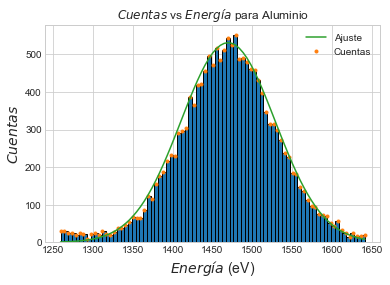

In [53]:
func = ODR.Model(Ajuste)
#data_real = ODR.RealData(x_data, y_data, sx=Err_x_data, sy=Err_y_data)
data_real = ODR.RealData(x_data, y_data)
odr = ODR.ODR(data_real, func, beta0=[1450,50,600])
out = odr.run()
#out.pprint()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

listaka.append(P)
desvka.append(B)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía es: (", P, " ± ", B, ") eV")
print("")
print("")

plt.hist(x_data, bins=81, edgecolor = 'black', weights = y_data)
#plt.errorbar(x_data, y_data, yerr=Err_y_data, xerr=Err_x_data, fmt='.', label="Datos")
plt.errorbar(x_data, y_data, fmt=".",label="Cuentas")
plt.plot(x_data, Ajuste(Aj, x_data), label='Ajuste', zorder=10)

plt.title("$Cuentas$ vs $Energía$ para {0}".format('Aluminio'))
plt.xlabel("$Energía$ (eV)", fontsize=14)
plt.ylabel("$Cuentas$", fontsize=14)
plt.legend()
plt.show()

# Silicio

In [54]:

leerDatos("Si.txt", 1950, 1500)
x_data = np.array(datos["Energía (eV)"])
y_data = np.array(datos["cuentas"])



[1731.94110425   61.11260207  647.23716966]
[0.75375541 0.49563211 3.63320406]


La energía es: ( 1731.9411042480097  ±  61.11260207495836 ) eV




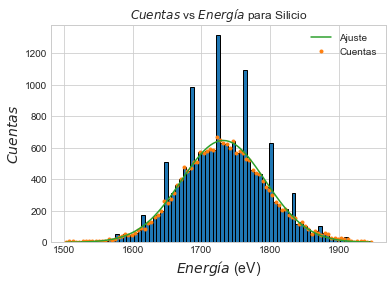

In [55]:
func = ODR.Model(Ajuste)
data_real = ODR.RealData(x_data, y_data)
odr = ODR.ODR(data_real, func, beta0=[1700,50,1100])
out = odr.run()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

listaka.append(P)
desvka.append(B)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía es: (", P, " ± ", B, ") eV")
print("")
print("")

histograma("Silicio")

# Fósforo

In [56]:

leerDatos("FePO4.txt", 2200, 1700)
x_data = np.array(datos["Energía (eV)"])
y_data = np.array(datos["cuentas"])


[1977.67680678   94.0065417   253.74920815]
[3.25529076 2.5792272  5.92065175]


La energía es: ( 1977.676806784078  ±  94.00654170198557 ) eV




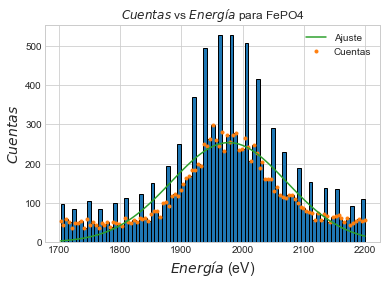

In [57]:
func = ODR.Model(Ajuste)
data_real = ODR.RealData(x_data, y_data)
odr = ODR.ODR(data_real, func, beta0=[1950,60,600])
out = odr.run()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

listaka.append(P)
desvka.append(B)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía es: (", P, " ± ", B, ") eV")
print("")
print("")

histograma("FePO4")

# Azufre

In [58]:

leerDatos("Na2SO4.txt", 2700, 1800)
x_data = np.array(datos["Energía (eV)"])
y_data = np.array(datos["cuentas"]) 


[2308.19434524   74.34865951  832.57739897]
[1.91247148 1.15010141 8.0509133 ]


La energía es: ( 2308.1943452400405  ±  74.34865951426004 ) eV




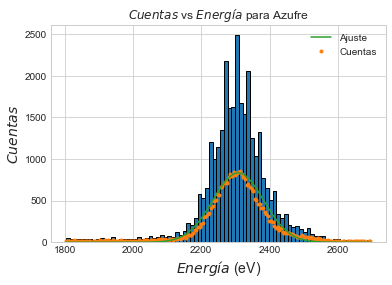

In [59]:
func = ODR.Model(Ajuste)
data_real = ODR.RealData(x_data, y_data)
odr = ODR.ODR(data_real, func, beta0=[2300,30,5000])
out = odr.run()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

listaka.append(P)
desvka.append(B)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía es: (", P, " ± ", B, ") eV")
print("")
print("")

histograma("Azufre")

# Cloro

In [60]:

leerDatos("KCl.txt", 2750, 2400)
x_data = np.array(datos["Energía (eV)"])
y_data = np.array(datos["cuentas"])


[2610.424246     66.05022187 6793.83045331]
[1.21170648 0.75384947 9.68549507]


La energía es: ( 2610.4242459953102  ±  66.05022187439677 ) eV




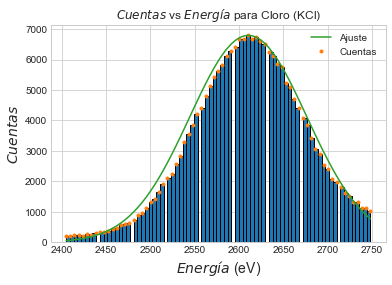

In [61]:
func = ODR.Model(Ajuste)
data_real = ODR.RealData(x_data, y_data)
odr = ODR.ODR(data_real, func, beta0=[2600,50,25000])
out = odr.run()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

listaka.append(P)
desvka.append(B)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía es: (", P, " ± ", B, ") eV")
print("")
print("")

histograma("Cloro (KCl)")

# Argon (NO ENCONTRE)
(voy a sacarlo de otro lado, x ej del cloro)

In [103]:
leerDatos("Si.txt", 3150, 2800)
x_data = np.array(datos["Energía (eV)"])
y_data = np.array(datos["cuentas"])


[2958.09331621   66.98052104  402.81991378]
[1.31629878 0.96999858 4.08824074]


La energía es: ( 2958.0933162117617  ±  66.9805210402866 ) eV




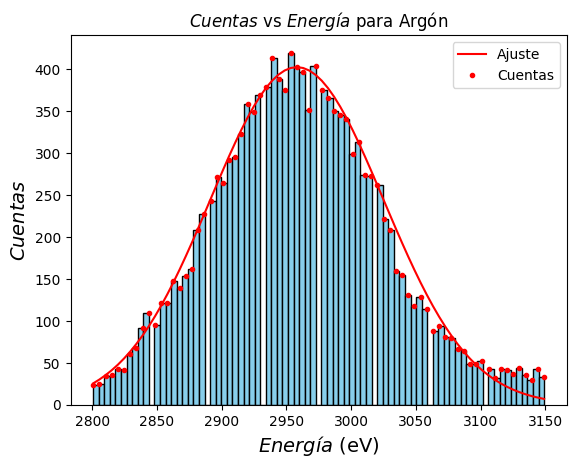

In [110]:
func = ODR.Model(Ajuste)
data_real = ODR.RealData(x_data, y_data)
odr = ODR.ODR(data_real, func, beta0=[2950,80,2900])
out = odr.run()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

listaka.append(P)
desvka.append(B)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía es: (", P, " ± ", B, ") eV")
print("")
print("")

histograma("Argón")

# Silicio (segunda vez xd dio lo mismo)

In [64]:
def Ajuste2(C, t):
    return C[2]*np.exp((-1/2)*np.power((t-C[0])/C[1],2)) + C[5]*np.exp((-1/2)*np.power((t-C[3])/C[4],2))


In [65]:

leerDatos("Si.txt", 1900, 1550)
x_data = np.array(datos["Energía (eV)"])
y_data = np.array(datos["cuentas"])


[1731.32328707   60.62044583  648.21988186]
[0.77927417 0.52689425 3.76390411]


La energía es: ( 1731.3232870734703  ±  60.62044582915833 ) eV




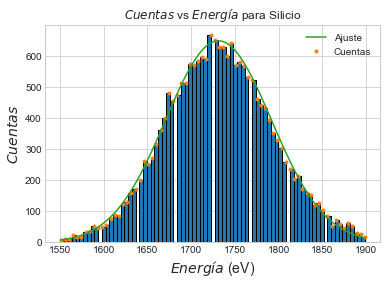

In [66]:
func = ODR.Model(Ajuste)
data_real = ODR.RealData(x_data, y_data)
odr = ODR.ODR(data_real, func, beta0=[1700,50,1100])
out = odr.run()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

#listaka.append(P)
#desvka.append(B)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía es: (", P, " ± ", B, ") eV")
print("")
print("")

histograma("Silicio")

# Potasio


In [97]:

leerDatos("KCl.txt", 3750, 3100)
x_data = np.array(datos["Energía (eV)"])
y_data = np.array(datos["cuentas"])


[3304.3428372    64.8595369  8930.3402809  3585.55542594   62.58988305
 1416.20079044]
[ 0.80086751  0.44787552 22.82430461  0.91117952  0.7114591   9.02586383]


La energía K_α es: ( 3304.34283719977  ±  64.85953690017811 ) eV

La energía K_β es: ( 3585.555425941488  ±  62.58988305076548 ) eV




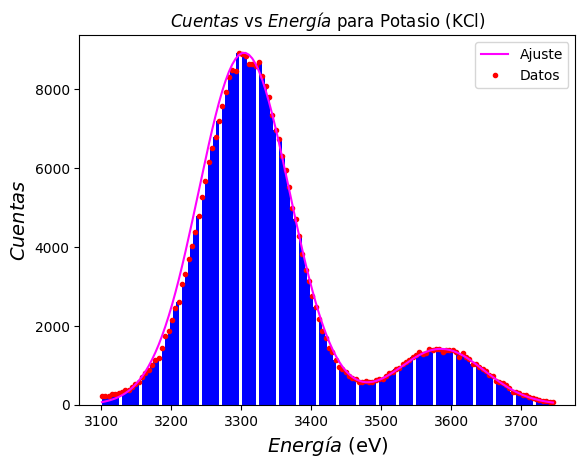

In [102]:
func = ODR.Model(Ajuste2)
data_real = ODR.RealData(x_data, y_data)
odr = ODR.ODR(data_real, func, beta0=[3350,60,30000, 3580, 60, 4600])
out = odr.run()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

P2 = Aj[3]
P2_err = Aj_err[3]

B2 = Aj[4]
B2_err = Aj_err[5]

listaka.append(P)
desvka.append(B)
listakb.append(P2)
desvkb.append(B2)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía K_α es: (", P, " ± ", B, ") eV")
print("")
print("La energía K_β es: (", P2, " ± ", B2, ") eV")
print("")
print("")

histograma2("Potasio (KCl)")

# Calcio

In [69]:

leerDatos("CaBr2.txt", 4200, 3500)
x_data = np.array(datos["Energía (eV)"])
y_data = np.array(datos["cuentas"])


[3700.   80. 2900. 4000.   60.  820.]
[0. 0. 0. 0. 0. 0.]


La energía K_α es: ( 3700.0  ±  80.0 ) eV

La energía K_β es: ( 4000.0  ±  60.0 ) eV




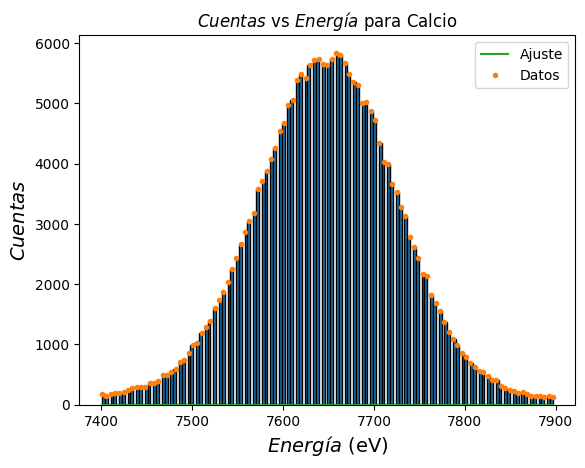

In [96]:
func = ODR.Model(Ajuste2)
data_real = ODR.RealData(x_data, y_data)
odr = ODR.ODR(data_real, func, beta0=[3700,80,2900, 4000, 60, 820])
out = odr.run()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

P2 = Aj[3]
P2_err = Aj_err[3]

B2 = Aj[4]
B2_err = Aj_err[5]

listaka.append(P)
desvka.append(B)
listakb.append(P2)
desvkb.append(B2)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía K_α es: (", P, " ± ", B, ") eV")
print("")
print("La energía K_β es: (", P2, " ± ", B2, ") eV")
print("")
print("")

plt.hist(x_data, bins=158, edgecolor = 'black', weights = y_data)
#plt.errorbar(x_data, y_data, yerr=Err_y_data, xerr=Err_x_data, fmt='.', label="Datos")
plt.errorbar(x_data, y_data, fmt='.', label="Datos")
plt.plot(x_data, Ajuste2(Aj, x_data), label='Ajuste', zorder=10)

plt.title("$Cuentas$ vs $Energía$ para {0}".format("Calcio"))
plt.xlabel("$Energía$ (eV)", fontsize=14)
plt.ylabel("$Cuentas$", fontsize=14)
plt.legend()
plt.show()

# Titanio

In [71]:

leerDatos("Ti.txt", 5200, 4200)
x_data = np.array(datos["Energía (eV)"])
y_data = np.array(datos["cuentas"])


[ 4510.47514898    72.63537259 10961.01992464  4934.06497064
    70.91722669  1710.55396856]
[ 1.21194233  0.55320271 14.69384048  1.40037451  0.83868165 10.67404097]


La energía K_α es: ( 4510.475148979458  ±  72.63537259482769 ) eV

La energía K_β es: ( 4934.064970643068  ±  70.91722668604486 ) eV




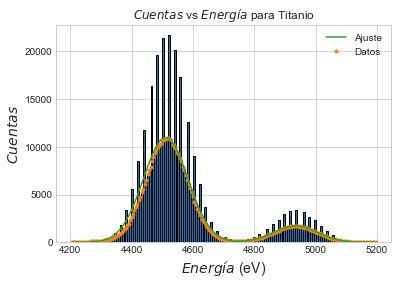

In [72]:
func = ODR.Model(Ajuste2)
data_real = ODR.RealData(x_data, y_data)
odr = ODR.ODR(data_real, func, beta0=[4550,60,87000, 4950, 70, 13300])
out = odr.run()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

P2 = Aj[3]
P2_err = Aj_err[3]

B2 = Aj[4]
B2_err = Aj_err[5]

listaka.append(P)
desvka.append(B)
listakb.append(P2)
desvkb.append(B2)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía K_α es: (", P, " ± ", B, ") eV")
print("")
print("La energía K_β es: (", P2, " ± ", B2, ") eV")
print("")
print("")

x_data = np.array(datos["Energía (eV)"])
y_data = np.array(datos["cuentas"])

plt.hist(x_data, bins=158, edgecolor = 'black', weights = y_data)
#plt.errorbar(x_data, y_data, yerr=Err_y_data, xerr=Err_x_data, fmt='.', label="Datos")
plt.errorbar(x_data, y_data, fmt='.', label="Datos")
plt.plot(x_data, Ajuste2(Aj, x_data), label='Ajuste', zorder=10)

plt.title("$Cuentas$ vs $Energía$ para {0}".format("Titanio"))
plt.xlabel("$Energía$ (eV)", fontsize=14)
plt.ylabel("$Cuentas$", fontsize=14)
plt.legend()
plt.show()

# Vanadio

In [73]:

leerDatos("Vanadio.txt", 5600, 4500)
x_data = np.array(datos["Energía (eV)"])
y_data = np.array(datos["cuentas"])


[4949.64500366   70.3931539  7450.06085084 5424.3390161    71.48737626
 1170.1236936 ]
[ 1.3361992   0.63298762 15.33863835  1.5819155   1.03931797 10.80032248]


La energía K_α es: ( 4949.645003664709  ±  70.39315389834944 ) eV

La energía K_β es: ( 5424.339016096138  ±  71.48737626439485 ) eV




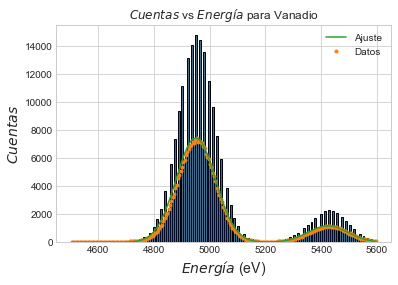

In [74]:
func = ODR.Model(Ajuste2)
data_real = ODR.RealData(x_data, y_data)
odr = ODR.ODR(data_real, func, beta0=[4950,80,101000, 5400, 70, 15400])
out = odr.run()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

P2 = Aj[3]
P2_err = Aj_err[3]

B2 = Aj[4]
B2_err = Aj_err[5]

listaka.append(P)
desvka.append(B)
listakb.append(P2)
desvkb.append(B2)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía K_α es: (", P, " ± ", B, ") eV")
print("")
print("La energía K_β es: (", P2, " ± ", B2, ") eV")
print("")
print("")

plt.hist(x_data, bins=158, edgecolor = 'black', weights = y_data)
#plt.errorbar(x_data, y_data, yerr=Err_y_data, xerr=Err_x_data, fmt='.', label="Datos")
plt.errorbar(x_data, y_data, fmt='.', label="Datos")
plt.plot(x_data, Ajuste2(Aj, x_data), label='Ajuste', zorder=10)

plt.title("$Cuentas$ vs $Energía$ para {0}".format("Vanadio"))
plt.xlabel("$Energía$ (eV)", fontsize=14)
plt.ylabel("$Cuentas$", fontsize=14)
plt.legend()
plt.show()

# Cromo

In [75]:

leerDatos("Cr.txt", 6200, 5150)
x_dataCr = np.array(datos["Energía (eV)"])
y_dataCr = np.array(datos["cuentas"])


[ 5419.31306426    74.07397177 30201.92959284  5947.35815941
    77.61020726  5084.03472375]
[ 0.87633538  0.40750861 30.38215013  0.92666684  0.50461619 11.54182996]


La energía K_α es: ( 5419.313064256872  ±  74.07397176828029 ) eV

La energía K_β es: ( 5947.3581594050665  ±  77.61020725586519 ) eV




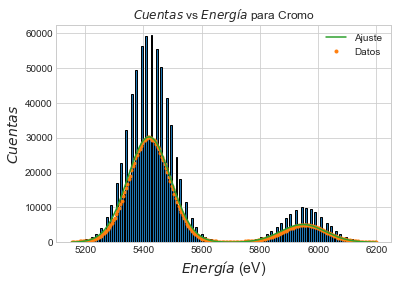

In [76]:
func = ODR.Model(Ajuste2)
data_real = ODR.RealData(x_dataCr, y_dataCr)
odr = ODR.ODR(data_real, func, beta0=[5400,80,86700, 5950, 80, 13000])
out = odr.run()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

P2 = Aj[3]
P2_err = Aj_err[3]

B2 = Aj[4]
B2_err = Aj_err[5]

listaka.append(P)
desvka.append(B)
listakb.append(P2)
desvkb.append(B2)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía K_α es: (", P, " ± ", B, ") eV")
print("")
print("La energía K_β es: (", P2, " ± ", B2, ") eV")
print("")
print("")

plt.hist(x_dataCr, bins=158, edgecolor = 'black', weights = y_dataCr)
#plt.errorbar(x_data, y_data, yerr=Err_y_data, xerr=Err_x_data, fmt='.', label="Datos")
plt.errorbar(x_dataCr, y_dataCr, fmt='.', label="Datos")
plt.plot(x_dataCr, Ajuste2(Aj, x_dataCr), label='Ajuste', zorder=10)

plt.title("$Cuentas$ vs $Energía$ para {0}".format("Cromo"))
plt.xlabel("$Energía$ (eV)", fontsize=14)
plt.ylabel("$Cuentas$", fontsize=14)
plt.legend()
plt.show()

# Manganeso


In [77]:

leerDatos("Manganeso.txt", 6700, 5600)
x_data = np.array(datos["Energía (eV)"])
y_data = np.array(datos["cuentas"])


[ 5899.32815035    76.61401871 47298.48892824  6483.00961143
    78.78222127  7327.30518837]
[ 1.34333992  0.57446393 35.02626201  1.54845595  0.87621824 36.78587961]


La energía K_α es: ( 5899.328150347064  ±  76.61401871084553 ) eV

La energía K_β es: ( 6483.009611426146  ±  78.78222126600843 ) eV




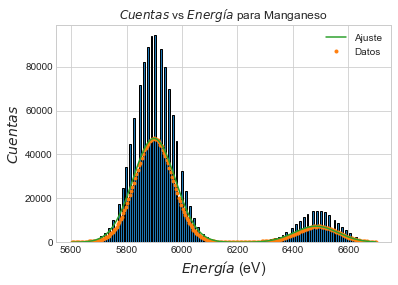

In [78]:
func = ODR.Model(Ajuste2)
data_real = ODR.RealData(x_data, y_data)
odr = ODR.ODR(data_real, func, beta0=[5900,80,130000, 6500, 80, 20000])
out = odr.run()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

P2 = Aj[3]
P2_err = Aj_err[3]

B2 = Aj[4]
B2_err = Aj_err[5]

listaka.append(P)
desvka.append(B)
listakb.append(P2)
desvkb.append(B2)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía K_α es: (", P, " ± ", B, ") eV")
print("")
print("La energía K_β es: (", P2, " ± ", B2, ") eV")
print("")
print("")

plt.hist(x_data, bins=158, edgecolor = 'black', weights = y_data)
#plt.errorbar(x_data, y_data, yerr=Err_y_data, xerr=Err_x_data, fmt='.', label="Datos")
plt.errorbar(x_data, y_data, fmt='.', label="Datos")
plt.plot(x_data, Ajuste2(Aj, x_data), label='Ajuste', zorder=10)

plt.title("$Cuentas$ vs $Energía$ para {0}".format("Manganeso"))
plt.xlabel("$Energía$ (eV)", fontsize=14)
plt.ylabel("$Cuentas$", fontsize=14)
plt.legend()
plt.show()

# Hierro

In [79]:

leerDatos("Fe.txt", 7300, 6150)
x_data = np.array(datos["Energía (eV)"])
y_data = np.array(datos["cuentas"])


[ 6408.49306873    78.59110322 64127.75521905  7050.35240683
    84.31993358  9877.50620222]
[ 1.58478827  0.70671641 26.27572235  1.6383018   0.86142098 40.41573333]


La energía K_α es: ( 6408.4930687307815  ±  78.59110322262626 ) eV

La energía K_β es: ( 7050.352406825502  ±  84.31993358470255 ) eV




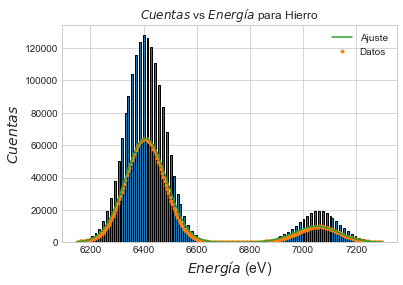

In [80]:
func = ODR.Model(Ajuste2)
data_real = ODR.RealData(x_data, y_data)
odr = ODR.ODR(data_real, func, beta0=[6400,80,67000, 7050, 80, 10000])
out = odr.run()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

P2 = Aj[3]
P2_err = Aj_err[3]

B2 = Aj[4]
B2_err = Aj_err[5]

listaka.append(P)
desvka.append(B)
listakb.append(P2)
desvkb.append(B2)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía K_α es: (", P, " ± ", B, ") eV")
print("")
print("La energía K_β es: (", P2, " ± ", B2, ") eV")
print("")
print("")

plt.hist(x_data, bins=158, edgecolor = 'black', weights = y_data)
#plt.errorbar(x_data, y_data, yerr=Err_y_data, xerr=Err_x_data, fmt='.', label="Datos")
plt.errorbar(x_data, y_data, fmt='.', label="Datos")
plt.plot(x_data, Ajuste2(Aj, x_data), label='Ajuste', zorder=10)

plt.title("$Cuentas$ vs $Energía$ para {0}".format("Hierro"))
plt.xlabel("$Energía$ (eV)", fontsize=14)
plt.ylabel("$Cuentas$", fontsize=14)
plt.legend()
plt.show()

# Cobalto

In [81]:

leerDatos("Cobalto.txt", 7900, 6600)
x_data = np.array(datos["Energía (eV)"])
y_data = np.array(datos["cuentas"])


[ 6928.83939202    80.36175774 43029.61494444  7638.56235331
    89.42617727  5824.77336544]
[ 2.03784101  0.84013671 55.9664451   2.23479356  1.1270379  29.69568851]


La energía K_α es: ( 6928.839392017652  ±  80.36175774063284 ) eV

La energía K_β es: ( 7638.562353306889  ±  89.42617727251584 ) eV




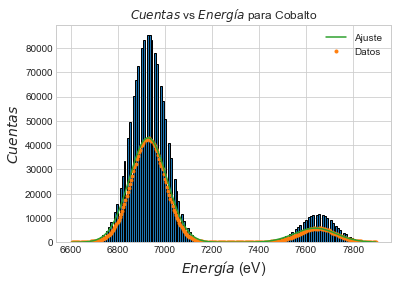

In [82]:
func = ODR.Model(Ajuste2)
data_real = ODR.RealData(x_data, y_data)
odr = ODR.ODR(data_real, func, beta0=[6900,80,83000, 7600, 70, 11000])
out = odr.run()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

P2 = Aj[3]
P2_err = Aj_err[3]

B2 = Aj[4]
B2_err = Aj_err[5]

listaka.append(P)
desvka.append(B)
listakb.append(P2)
desvkb.append(B2)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía K_α es: (", P, " ± ", B, ") eV")
print("")
print("La energía K_β es: (", P2, " ± ", B2, ") eV")
print("")
print("")

plt.hist(x_data, bins=158, edgecolor = 'black', weights = y_data)
#plt.errorbar(x_data, y_data, yerr=Err_y_data, xerr=Err_x_data, fmt='.', label="Datos")
plt.errorbar(x_data, y_data, fmt='.', label="Datos")
plt.plot(x_data, Ajuste2(Aj, x_data), label='Ajuste', zorder=10)

plt.title("$Cuentas$ vs $Energía$ para {0}".format("Cobalto"))
plt.xlabel("$Energía$ (eV)", fontsize=14)
plt.ylabel("$Cuentas$", fontsize=14)
plt.legend()
plt.show()

# Cobalto Separados

## K Alfa

In [83]:

leerDatos("Cobalto.txt", 7200, 6600)
x_data = np.array(datos["Energía (eV)"])
y_data = np.array(datos["cuentas"])


[ 6924.36227064    77.48367645 43032.17875234]
[ 1.31658682  0.58876537 86.3666826 ]


La energía K_a es: ( 6924.362270637078  ±  77.48367645023596 ) eV




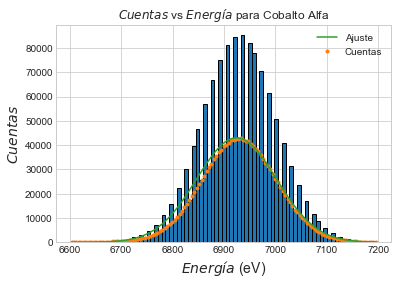

In [84]:
func = ODR.Model(Ajuste)
data_real = ODR.RealData(x_data, y_data)
odr = ODR.ODR(data_real, func, beta0=[6900,80,83000])
out = odr.run()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

#listaka.append(P)
#desvka.append(B)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía K_a es: (", P, " ± ", B, ") eV")
print("")
print("")

histograma("Cobalto Alfa")

## K beta

In [85]:

leerDatos("Cobalto.txt", 7900, 7400)
x_data = np.array(datos["Energía (eV)"])
y_data = np.array(datos["cuentas"])


[7646.24803989   81.06289342 5830.35985977]
[ 1.46490845  0.82857028 20.1658881 ]


La energía K_b es: ( 7646.248039892958  ±  81.06289341809205 ) eV




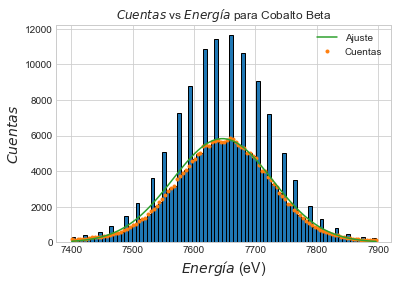

In [86]:
func = ODR.Model(Ajuste)
data_real = ODR.RealData(x_data, y_data)
odr = ODR.ODR(data_real, func, beta0=[7600, 70, 11000])
out = odr.run()
Aj = out.beta
Aj_err = out.sd_beta

P = Aj[0]
P_err = Aj_err[0]

B = Aj[1]
B_err = Aj_err[1]

#listaka.append(P)
#desvka.append(B)

print("")
print(Aj)
print(Aj_err)
print("")
print("")

print("La energía K_b es: (", P, " ± ", B, ") eV")
print("")
print("")

histograma("Cobalto Beta")

# Rectas para K_a y K_b


[7.78358447e+08 1.07001124e+00]
[1.29760262e+06 3.24182892e-02]



[7.26787863e+08 1.57199982e+00]
[5.75138082e+05 1.72820365e-02]




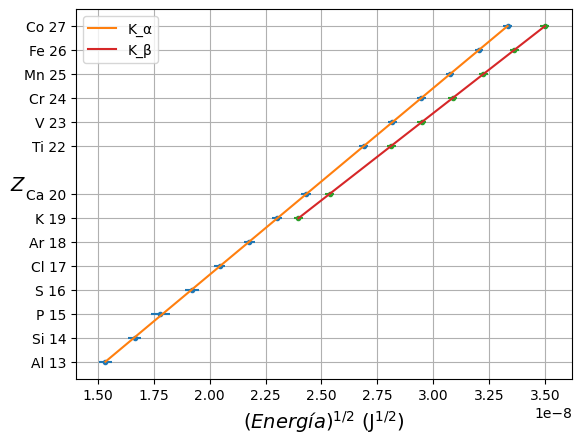

C con K_a es: ( 778358447.2948617  ±  1297602.6201654288 ) J^(1/2)

R con K_α es: ( 11079056.984667018  ±  36939.827459263 ) m^-1

Sigma para K_α es:  1.0700112358482379  ±  0.03241828918521601


C con K_b es: ( 726787862.9218223  ±  575138.0821302586 ) J^(1/2)

R con K_β es: ( 10721623.087692587  ±  16968.950788993327 ) m^-1

Sigma para K_β es:  1.571999821713458  ±  0.017282036503436314


In [92]:
c = 299792458
h = 6.62606896E-34

def lineal(C, t):
    return C[0]*t + C[1]

Zka = [13, 14, 15, 16, 17,18, 19, 20, 22, 23, 24, 25, 26, 27]
Zkb = [19, 20, 22, 23, 24, 25, 26, 27]
Zlab1 = ["Al 13","Si 14","P 15","S 16","Cl 17","Ar 18","K 19","Ca 20","Ti 22","V 23","Cr 24","Mn 25","Fe 26","Co 27"]

xka = np.array(listaka) #en eV
xka_err = np.array(desvka) #en eV

Xka = np.sqrt(1.6022E-19*xka) #pasar de eV a J y aplicar raiz
Xka_err = np.sqrt((1.6022E-19)/xka)*xka_err/2


xkb = np.array(listakb) #en eV
xkb_err = np.array(desvkb) #en eV

Xkb = np.sqrt(1.6022E-19*xkb) #pasar de eV a J y aplicar raiz
Xkb_err = np.sqrt((1.6022E-19)/xkb)*xkb_err/2

func = ODR.Model(lineal)
#data_real = ODR.RealData(x_data, y_data, sx=Err_x_data, sy=Err_y_data)
data_realka = ODR.RealData(Xka, Zka, sx=Xka_err)
odrka = ODR.ODR(data_realka, func, beta0=[0,0])
outka = odrka.run()
#out.pprint()
Ajka = outka.beta
Ajka_err = outka.sd_beta

Pka = Ajka[0]
Pka_err = Ajka_err[0]

Bka = Ajka[1]
Bka_err = Ajka_err[1]


print("")
print(Ajka)
print(Ajka_err)
print("")
print("")

data_realkb = ODR.RealData(Xkb, Zkb, sx=Xkb_err)
odrkb = ODR.ODR(data_realkb, func, beta0=[0,0])
outkb = odrkb.run()
#out.pprint()
Ajkb = outkb.beta
Ajkb_err = outkb.sd_beta

Pkb = Ajkb[0]
Pkb_err = Ajkb_err[0]

Bkb = Ajkb[1]
Bkb_err = Ajkb_err[1]


print("")
print(Ajkb)
print(Ajkb_err)
print("")
print("")

#plt.errorbar(x_data, y_data, yerr=Err_y_data, xerr=Err_x_data, fmt='.', label="Datos")
plt.errorbar(Xka, Zka, xerr=Xka_err, fmt='.')
plt.plot(Xka, lineal(Ajka, Xka), zorder=10, label="K_α")

plt.errorbar(Xkb, Zkb, xerr=Xkb_err, fmt='.')
plt.plot(Xkb, lineal(Ajkb, Xkb), zorder=10, label="K_β")
#Darle un estilo al plot
plt.style.use('default')
#plt.title("$Z$ vs $Energía$")
plt.xlabel("$(Energía)^{1/2}$ (J$^{1/2}$)", fontsize=14)
plt.ylabel("$Z$", fontsize=14, rotation=0)
plt.yticks(ticks=Zka, labels=Zlab1)
plt.grid()
plt.legend()
plt.show()

Rka = 4/(h*c*(Pka**2)*3)
Rka_err = 8*Pka_err/(h*c*(Pka**3)*3)

Rkb = 9/(h*c*(Pkb**2)*8)
Rkb_err = 18*Pkb_err/(h*c*(Pkb**3)*8)

print("C con K_a es: (", Pka, " ± ", Pka_err, ") J^(1/2)")
print("")
print("R con K_α es: (", Rka, " ± ", Rka_err, ") m^-1")
print("")
print("Sigma para K_α es: ", Bka, " ± ", Bka_err)
print("")
print("")
print("C con K_b es: (", Pkb, " ± ", Pkb_err, ") J^(1/2)")
print("")
print("R con K_β es: (", Rkb, " ± ", Rkb_err, ") m^-1")
print("")
print("Sigma para K_β es: ", Bkb, " ± ", Bkb_err)

In [93]:
def lineal(C, t):
    return C[0]*t + C[1]

Zla = [41, 42, 44, 45, 46, 47, 50, 51, 56, 57, 58, 60, 62, 63, 64, 66, 67]
Zlb = [44, 45, 47, 50, 51, 56, 57, 58, 60, 62, 63, 64, 66]
Zlg = [56, 57, 58, 60, 62, 63, 64]
Zlab2 = ["Nb 41", "Mo 42", "Ru 44", "Rh 45", "Pd 46", "Ag 47", "Sn 50", "Sb 51", "Ba 56", "La 57", "Ce 58", "Nd 60", "Sm 62", "Eu 63", "Gd 64", "Dy 66", "Ho 67"]

xla = np.array(listala) #en eV
xla_err = np.array(desvla) #en eV

Xla = np.sqrt(1.6022E-19*xla) #pasar de eV a J y aplicar raiz
Xla_err = np.sqrt((1.6022E-19)/xla)*xla_err/2


xlb = np.array(listalb) #en eV
xlb_err = np.array(desvlb) #en eV

Xlb = np.sqrt(1.6022E-19*xlb) #pasar de eV a J y aplicar raiz
Xlb_err = np.sqrt((1.6022E-19)/xlb)*xlb_err/2

xlg = np.array(listalg) #en eV
xlg_err = np.array(desvlg) #en eV

Xlg = np.sqrt(1.6022E-19*xlg) #pasar de eV a J y aplicar raiz
Xlg_err = np.sqrt((1.6022E-19)/xlg)*xlg_err/2

func = ODR.Model(lineal)
#data_real = ODR.RealData(x_data, y_data, sx=Err_x_data, sy=Err_y_data)
data_realla = ODR.RealData(Xla, Zla, sx=Xla_err)
odrla = ODR.ODR(data_realla, func, beta0=[0,0])
outla = odrla.run()
#out.pprint()
Ajla = outla.beta
Ajla_err = outla.sd_beta

Pla = Ajla[0]
Pla_err = Ajla_err[0]

Bla = Ajla[1]
Bla_err = Ajla_err[1]


print("")
print(Ajla)
print(Ajla_err)
print("")
print("")

data_reallb = ODR.RealData(Xlb, Zlb, sx=Xlb_err)
odrlb = ODR.ODR(data_reallb, func, beta0=[0,0])
outlb = odrlb.run()
#out.pprint()
Ajlb = outlb.beta
Ajlb_err = outlb.sd_beta

Plb = Ajlb[0]
Plb_err = Ajlb_err[0]

Blb = Ajlb[1]
Blb_err = Ajlb_err[1]


print("")
print(Ajlb)
print(Ajlb_err)
print("")
print("")


data_reallg = ODR.RealData(Xlg, Zlg, sx=Xlg_err)
odrlg = ODR.ODR(data_reallg, func, beta0=[0,0])
outlg = odrlg.run()
#out.pprint()
Ajlg = outlg.beta
Ajlg_err = outlg.sd_beta

Plg = Ajlg[0]
Plg_err = Ajlg_err[0]

Blg = Ajlg[1]
Blg_err = Ajlg_err[1]


print("")
print(Ajlg)
print(Ajlg_err)
print("")
print("")

#plt.errorbar(x_data, y_data, yerr=Err_y_data, xerr=Err_x_data, fmt='.', label="Datos")
plt.errorbar(Xla, Zla, xerr=Xla_err, fmt='.', label="Datos L_α")
plt.plot(Xla, lineal(Ajla, Xla), label='Ajuste L_α', zorder=10)

plt.errorbar(Xlb, Zlb, xerr=Xlb_err, fmt='.', label="Datos L_β")
plt.plot(Xlb, lineal(Ajlb, Xlb), label='Ajuste L_β', zorder=10)

plt.errorbar(Xlg, Zlg, xerr=Xlg_err, fmt='.', label="Datos L_γ")
plt.plot(Xlg, lineal(Ajlg, Xlg), label='Ajuste L_γ', zorder=10)

plt.title("$Z$ vs $Energía$")
plt.xlabel("$(Energía)^{1/2}$ (J$^{1/2}$)", fontsize=14)
plt.ylabel("$Z$", fontsize=14, rotation=0)
plt.yticks(ticks=Zla, labels=Zlab2)
plt.legend()
plt.show()

Rla = 36/(h*c*(Pla**2)*5)
Rla_err = 72*Pla_err/(h*c*(Pla**3)*5)

Rlb = 64/(h*c*(Plb**2)*12)
Rlb_err = 128*Plb_err/(h*c*(Plb**3)*12)

Rlg = 100/(h*c*(Plg**2)*21)
Rlg_err = 200*Plg_err/(h*c*(Plg**3)*21)

print("")
print("R con L_α es: (", Rla, " ± ", Rla_err, ") m^-1")
print("")
print("Sigma para L_α es: ", Bla, " ± ", Bla_err)
print("")
print("")
print("R con L_β es: (", Rlb, " ± ", Rlb_err, ") m^-1")
print("")
print("Sigma para L_β es: ", Blb, " ± ", Blb_err)
print("")
print("")
print("R con L_γ es: (", Rlg, " ± ", Rlg_err, ") m^-1")
print("")
print("Sigma para L_γ es: ", Blg, " ± ", Blg_err)def lineal(C, t):
    return C[0]*t + C[1]

Zla = [41, 42, 44, 45, 46, 47, 50, 51, 56, 57, 58, 60, 62, 63, 64, 66, 67]
Zlb = [44, 45, 47, 50, 51, 56, 57, 58, 60, 62, 63, 64, 66]
Zlg = [56, 57, 58, 60, 62, 63, 64]
Zlab2 = ["Nb 41", "Mo 42", "Ru 44", "Rh 45", "Pd 46", "Ag 47", "Sn 50", "Sb 51", "Ba 56", "La 57", "Ce 58", "Nd 60", "Sm 62", "Eu 63", "Gd 64", "Dy 66", "Ho 67"]

xla = np.array(listala) #en eV
xla_err = np.array(desvla) #en eV

Xla = np.sqrt(1.6022E-19*xla) #pasar de eV a J y aplicar raiz
Xla_err = np.sqrt((1.6022E-19)/xla)*xla_err/2


xlb = np.array(listalb) #en eV
xlb_err = np.array(desvlb) #en eV

Xlb = np.sqrt(1.6022E-19*xlb) #pasar de eV a J y aplicar raiz
Xlb_err = np.sqrt((1.6022E-19)/xlb)*xlb_err/2

xlg = np.array(listalg) #en eV
xlg_err = np.array(desvlg) #en eV

Xlg = np.sqrt(1.6022E-19*xlg) #pasar de eV a J y aplicar raiz
Xlg_err = np.sqrt((1.6022E-19)/xlg)*xlg_err/2

func = ODR.Model(lineal)
#data_real = ODR.RealData(x_data, y_data, sx=Err_x_data, sy=Err_y_data)
data_realla = ODR.RealData(Xla, Zla, sx=Xla_err)
odrla = ODR.ODR(data_realla, func, beta0=[0,0])
outla = odrla.run()
#out.pprint()
Ajla = outla.beta
Ajla_err = outla.sd_beta

Pla = Ajla[0]
Pla_err = Ajla_err[0]

Bla = Ajla[1]
Bla_err = Ajla_err[1]


print("")
print(Ajla)
print(Ajla_err)
print("")
print("")

data_reallb = ODR.RealData(Xlb, Zlb, sx=Xlb_err)
odrlb = ODR.ODR(data_reallb, func, beta0=[0,0])
outlb = odrlb.run()
#out.pprint()
Ajlb = outlb.beta
Ajlb_err = outlb.sd_beta

Plb = Ajlb[0]
Plb_err = Ajlb_err[0]

Blb = Ajlb[1]
Blb_err = Ajlb_err[1]


print("")
print(Ajlb)
print(Ajlb_err)
print("")
print("")


data_reallg = ODR.RealData(Xlg, Zlg, sx=Xlg_err)
odrlg = ODR.ODR(data_reallg, func, beta0=[0,0])
outlg = odrlg.run()
#out.pprint()
Ajlg = outlg.beta
Ajlg_err = outlg.sd_beta

Plg = Ajlg[0]
Plg_err = Ajlg_err[0]

Blg = Ajlg[1]
Blg_err = Ajlg_err[1]


print("")
print(Ajlg)
print(Ajlg_err)
print("")
print("")

#plt.errorbar(x_data, y_data, yerr=Err_y_data, xerr=Err_x_data, fmt='.', label="Datos")
plt.errorbar(Xla, Zla, xerr=Xla_err, fmt='.', label="Datos L_α")
plt.plot(Xla, lineal(Ajla, Xla), label='Ajuste L_α', zorder=10)

plt.errorbar(Xlb, Zlb, xerr=Xlb_err, fmt='.', label="Datos L_β")
plt.plot(Xlb, lineal(Ajlb, Xlb), label='Ajuste L_β', zorder=10)

plt.errorbar(Xlg, Zlg, xerr=Xlg_err, fmt='.', label="Datos L_γ")
plt.plot(Xlg, lineal(Ajlg, Xlg), label='Ajuste L_γ', zorder=10)

plt.title("$Z$ vs $Energía$")
plt.xlabel("$(Energía)^{1/2}$ (J$^{1/2}$)", fontsize=14)
plt.ylabel("$Z$", fontsize=14, rotation=0)
plt.yticks(ticks=Zla, labels=Zlab2)
plt.legend()
plt.show()

Rla = 36/(h*c*(Pla**2)*5)
Rla_err = 72*Pla_err/(h*c*(Pla**3)*5)

Rlb = 64/(h*c*(Plb**2)*12)
Rlb_err = 128*Plb_err/(h*c*(Plb**3)*12)

Rlg = 100/(h*c*(Plg**2)*21)
Rlg_err = 200*Plg_err/(h*c*(Plg**3)*21)

print("")
print("R con L_α es: (", Rla, " ± ", Rla_err, ") m^-1")
print("")
print("Sigma para L_α es: ", Bla, " ± ", Bla_err)
print("")
print("")
print("R con L_β es: (", Rlb, " ± ", Rlb_err, ") m^-1")
print("")
print("Sigma para L_β es: ", Blb, " ± ", Blb_err)
print("")
print("")
print("R con L_γ es: (", Rlg, " ± ", Rlg_err, ") m^-1")
print("")
print("Sigma para L_γ es: ", Blg, " ± ", Blg_err)

SyntaxError: invalid syntax (<ipython-input-93-43007b8f48da>, line 130)